# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [83]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [75]:
penguins = load_penguins()
#Data cleaning
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [50]:
penguins['year'].unique()

array([2007, 2008, 2009])

We will need to dummify sex, species, and island.



In [ ]:
y = penguins['bill_depth_mm']
X = penguins.drop('bill_depth_mm', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [76]:
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [84]:
lr = LinearRegression()
my_pipeline = Pipeline(
    [('OLS', lr)]
)

In [85]:
OLS_fit = my_pipeline.fit(X_train, y_train)

In [86]:
y_pred = OLS_fit.predict(X_test)

In [87]:
mean_squared_error(y_test, y_pred)

4.169650483018527

In [101]:
from plotnine import ggplot, aes, geom_point, theme
X_test['y_test'] = y_test
X_test['Y_pred'] = y_pred
X_test.head()

,bill_length_mm,y_test,Y_pred
34,36.4,17.0,17.795054
174,46.5,14.5,16.962400
278,51.3,19.2,16.566683
312,47.6,18.3,16.871715
77,37.2,19.4,17.729102


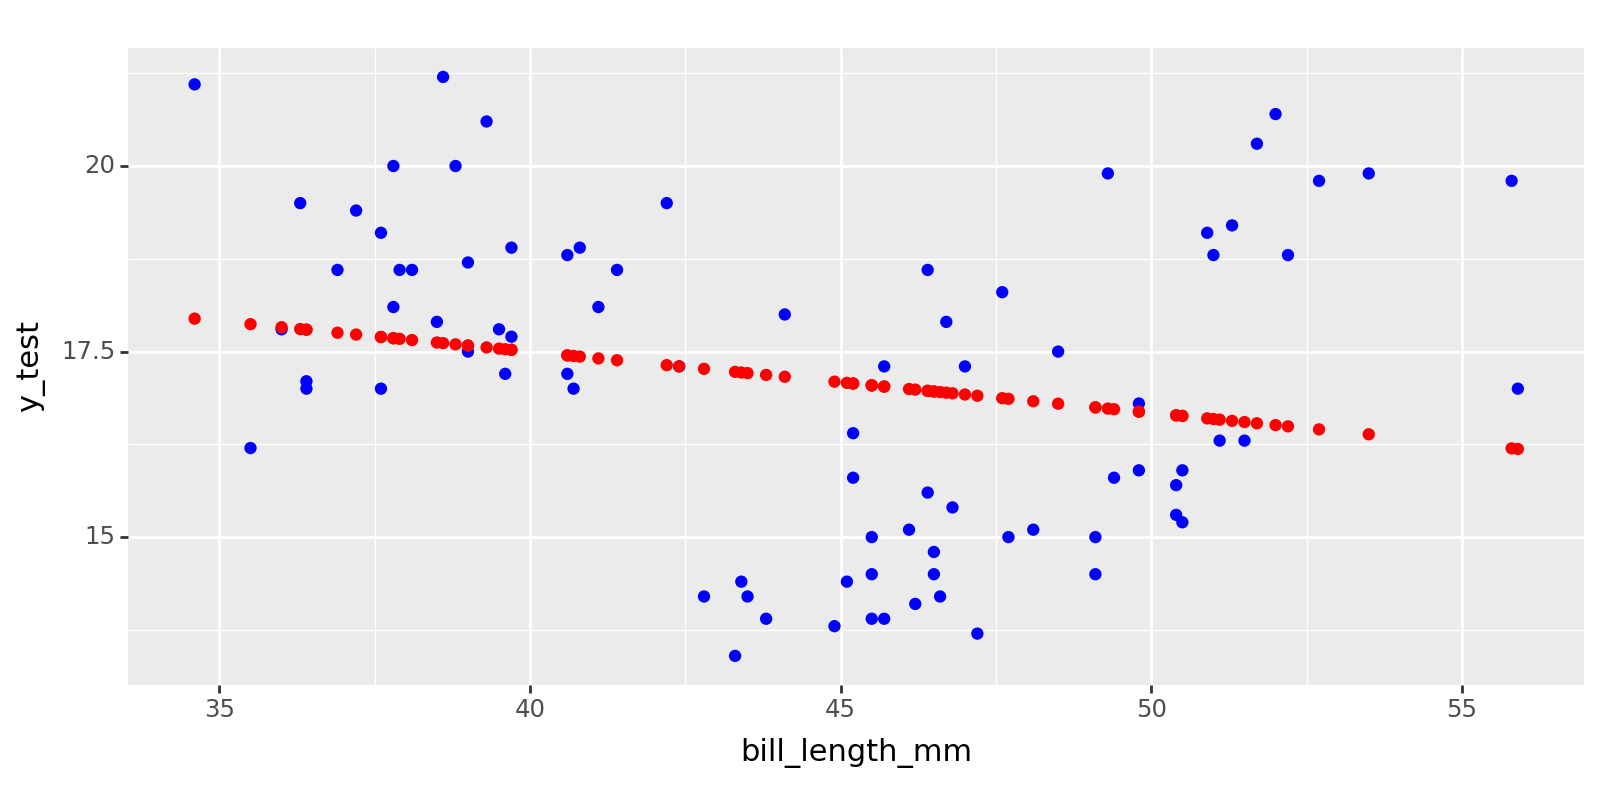

<Figure Size: (800 x 400)>

In [102]:
(
    ggplot(X_test)
    + aes(x='bill_length_mm')
    + geom_point(aes(y='y_test'), color='blue')  # First y variable
    + geom_point(aes(y='Y_pred'), color='red')   # Second y variable
    + theme(figure_size=(8, 4))
)

In [124]:
#Quadratic Model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
lr = LinearRegression()
ct = ColumnTransformer([('square', PolynomialFeatures(degree=2, include_bias=False), ['bill_length_mm'])])
my_pipeline = Pipeline(
    [('squared', ct), ('OLS', lr)]
)

In [125]:
my_pipeline

Pipeline(steps=[('squared',
                 ColumnTransformer(transformers=[('square',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['bill_length_mm'])])),
                ('OLS', LinearRegression())])

In [126]:
square_fit = my_pipeline.fit(X_train, y_train)
y_pred_sq = square_fit.predict(X_test)
mean_squared_error(y_test, y_pred_sq)


3.6809690314582078

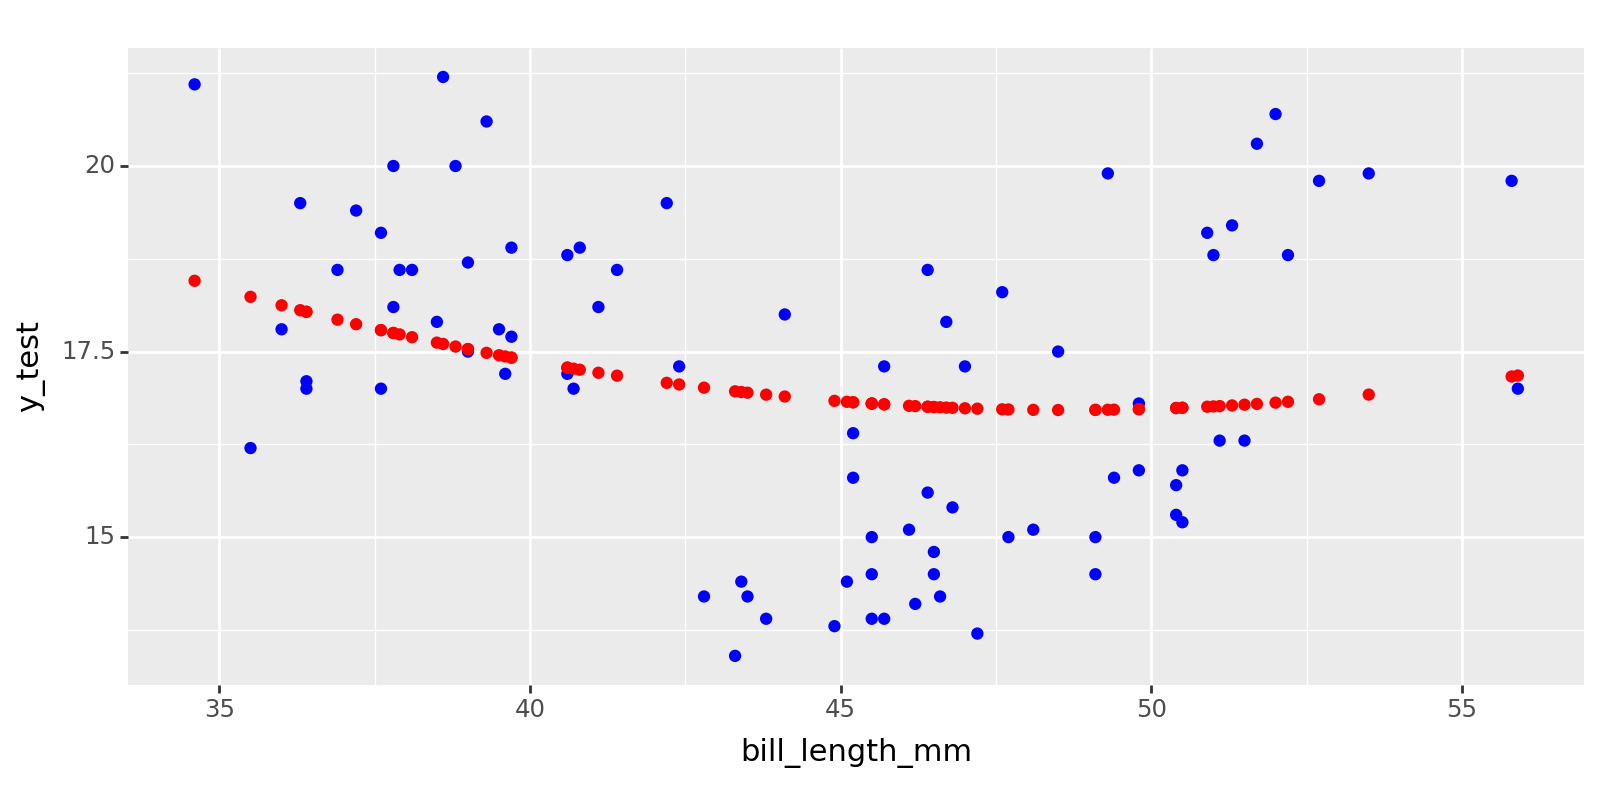

<Figure Size: (800 x 400)>

In [127]:
X_test['y_pred_sq'] = y_pred_sq
X_test.head()
(
    ggplot(X_test)
    + aes(x='bill_length_mm')
    + geom_point(aes(y='y_test'), color='blue')  # First y variable
    + geom_point(aes(y='y_pred_sq'), color='red')   # Second y variable
    + theme(figure_size=(8, 4))
)

In [128]:
#Cubic Model
ct = ColumnTransformer([('cubed', PolynomialFeatures(degree=3, include_bias=False), ['bill_length_mm'])])
my_pipeline = Pipeline(
    [('cubed', ct), ('OLS', lr)]
)

In [130]:
cubic_fit = my_pipeline.fit(X_train, y_train)
y_pred_cube = cubic_fit.predict(X_test)
mean_squared_error(y_test, y_pred_cube)


3.5825815891099793

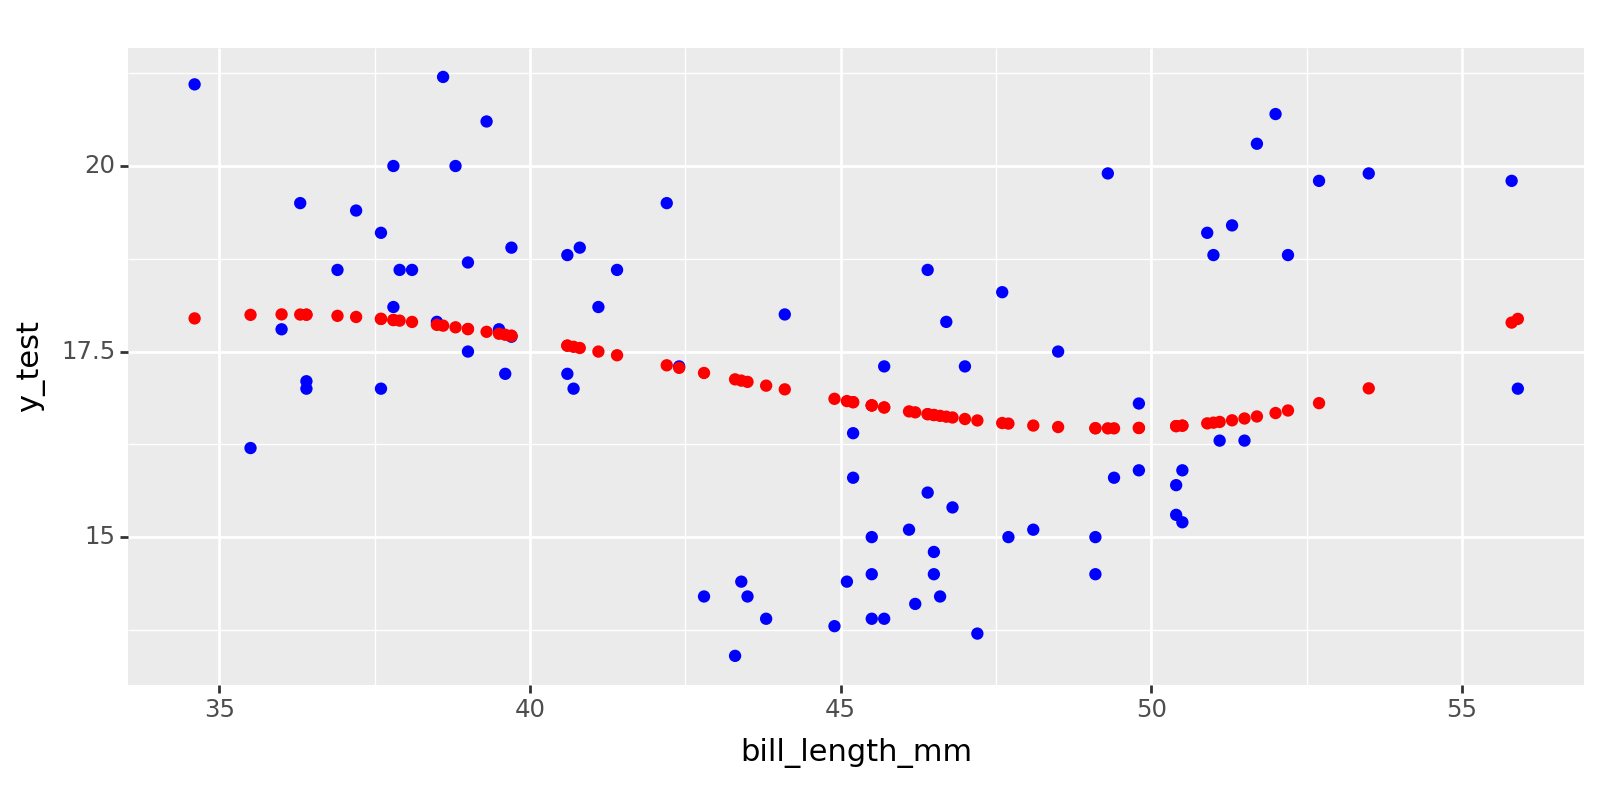

<Figure Size: (800 x 400)>

In [132]:
X_test['y_pred_cube'] = y_pred_cube
X_test.head()
(
    ggplot(X_test)
    + aes(x='bill_length_mm')
    + geom_point(aes(y='y_test'), color='blue')  # First y variable
    + geom_point(aes(y='y_pred_cube'), color='red')   # Second y variable
    + theme(figure_size=(8, 4))
)

In [133]:
#10 Degree
ct = ColumnTransformer([('10 degree', PolynomialFeatures(degree=10, include_bias=False), ['bill_length_mm'])])
my_pipeline = Pipeline(
    [('10 degree', ct), ('OLS', lr)]
)

In [134]:
ten_fit = my_pipeline.fit(X_train, y_train)
y_pred_ten = ten_fit.predict(X_test)
mean_squared_error(y_test, y_pred_ten)


2.6179836328240382

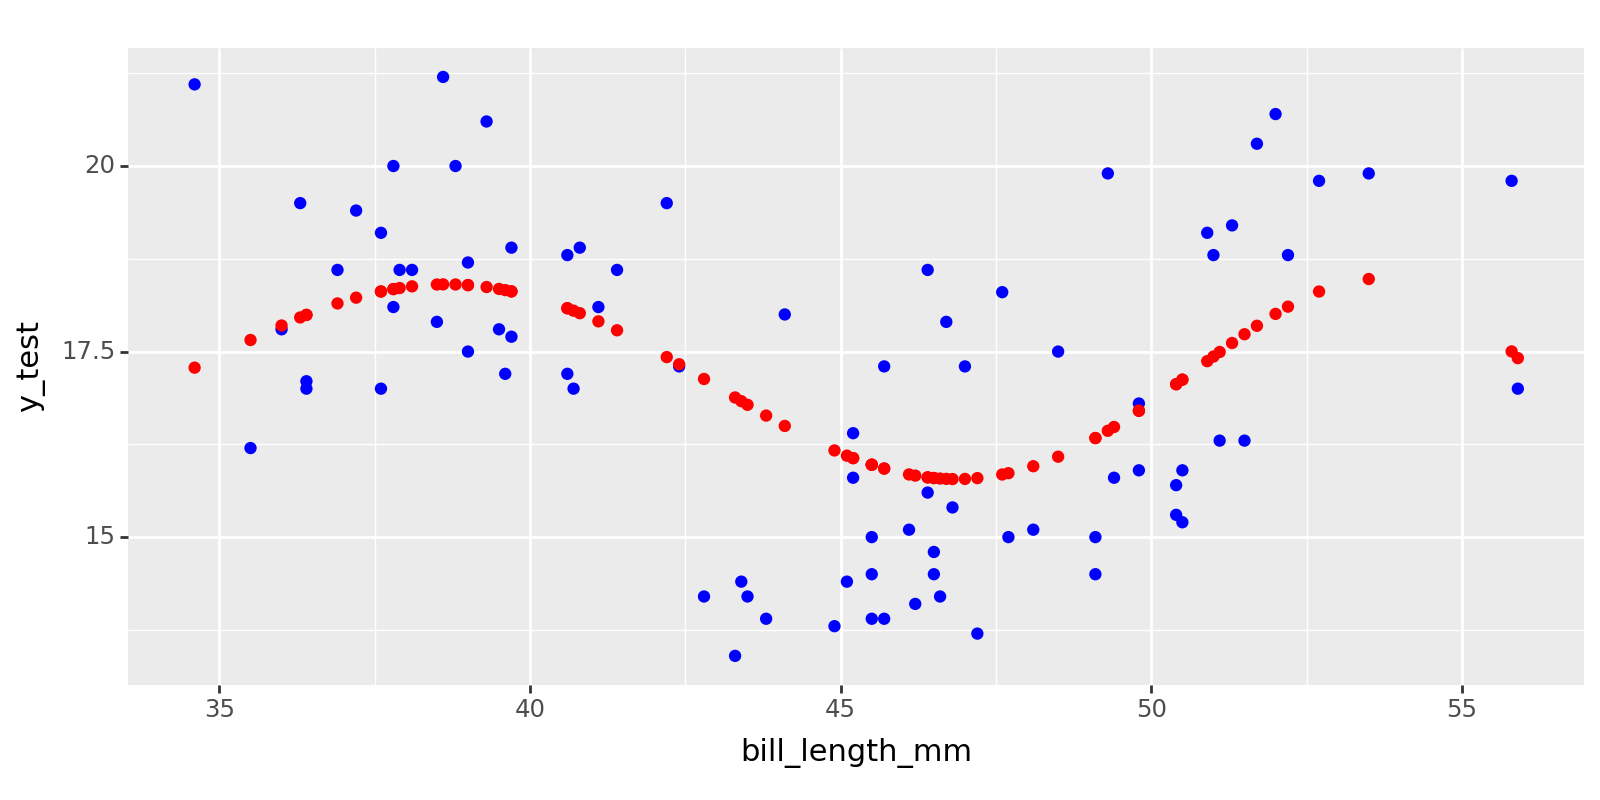

<Figure Size: (800 x 400)>

In [135]:
X_test['y_pred_ten_degree'] = y_pred_ten
X_test.head()
(
    ggplot(X_test)
    + aes(x='bill_length_mm')
    + geom_point(aes(y='y_test'), color='blue')  # First y variable
    + geom_point(aes(y='y_pred_ten_degree'), color='red')   # Second y variable
    + theme(figure_size=(8, 4))
)

In [136]:
X_test.head()

,bill_length_mm,y_test,Y_pred,y_pred_sq,y_pred_cube,y_pred_ten_degree
34,36.4,17.0,17.795054,18.035654,17.997051,17.993812
174,46.5,14.5,16.962400,16.752557,16.645126,15.795906
278,51.3,19.2,16.566683,16.774256,16.573687,17.615386
312,47.6,18.3,16.871715,16.721594,16.537341,15.843626
77,37.2,19.4,17.729102,17.868331,17.966148,18.226165


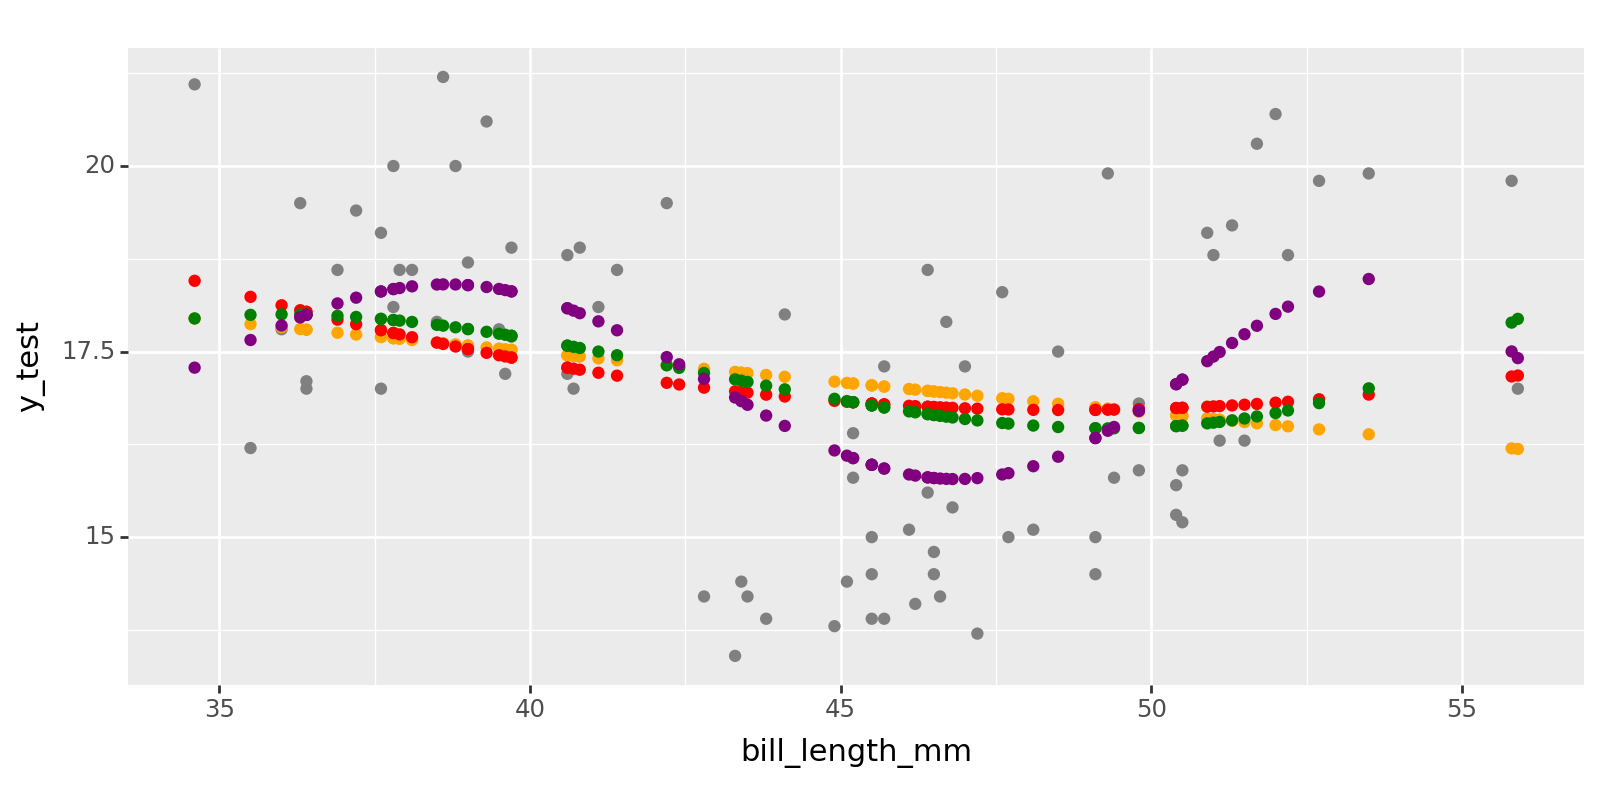

<Figure Size: (800 x 400)>

In [144]:
(
    ggplot(X_test)
    + aes(x='bill_length_mm')
    + geom_point(aes(y='y_test'), color='grey')
    + geom_point(aes(y='y_pred'), color='orange')
    + geom_point(aes(y='y_pred_sq'), color='red')
    + geom_point(aes(y='y_pred_cube'), color='green')
    + geom_point(aes(y='y_pred_ten_degree'), color='purple')

    + theme(figure_size=(8, 4))
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model and the squared model underfit the data. You can tell because it does not change much with the data and does not represent the data well. The ten degree model overfits the data because it goes through the average of every part of the data. The model that fits the data the best is the cubic model because it has a lower MSE than the linear and squared model and I would be most confident using this model to predict the next data point.